<a href="https://colab.research.google.com/github/parth-p/addons/blob/example-image-ops/examples/image_ops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-beta1
!pip install tensorflow-addons==0.4

Here is the list of image operations we'll be covering in this example:

TF addons :

- tfa.image.median_filter2d

- tfa.image.interpolate_bilinear

- tfa.image.euclidean_dist_transform

- tfa.image.rotate

- tfa.image.transform

- tfa.image.distort_image_ops.random_hsv_in_yiq

- tfa.image.distort_image_ops.adjust_hsv_in_yiq

- tfa.image.dense_image_warp

- tfa.image.interpolate_bilinear


In [0]:
import tensorflow as tf
import tensorflow_addons as tfa
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!wget https://i.dailymail.co.uk/i/pix/2015/09/01/18/2BE1E88B00000578-3218613-image-m-5_1441127035222.jpg
!wget https://i.stack.imgur.com/nm2HM.png

In [0]:
i1 = Image.open('nm2HM.png')
i1.convert('L')
gray = np.array(i1)
i2 = Image.open('./2BE1E88B00000578-3218613-image-m-5_1441127035222.jpg')
i2.convert('L')
color = np.array(i2)

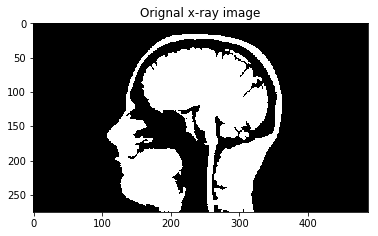

In [5]:
plt.title("Orignal x-ray image")
plt.imshow(gray)

TF Addons
Median filter 2D

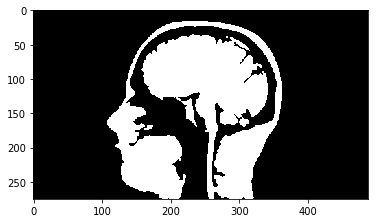

In [0]:
median = tfa.image.median_filter2d(gray)
plt.imshow(median, cmap='gray')

Rotate Image

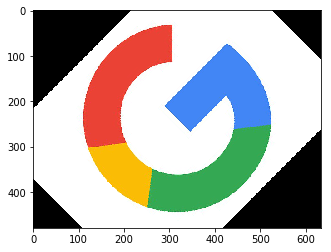

In [0]:
rotate = tfa.image.transform_ops.rotate(color, np.pi/4)
plt.imshow(rotate)

Transform Image </br>
Note: Here transform is done using random value

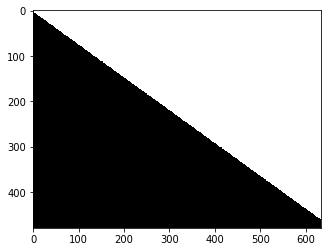

In [0]:
color1 = tf.convert_to_tensor(color)
new = tf.image.convert_image_dtype(color1, tf.dtypes.float32)
transform = tfa.image.transform_ops.transform(new,tf.random.uniform([8], -1, 1))
final = tf.image.convert_image_dtype(transform, tf.dtypes.uint8)
plt.imshow(final)

Random HSV in YIQ

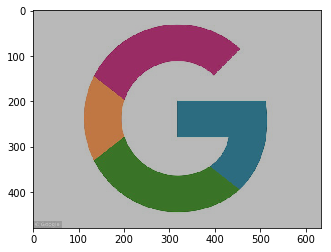

In [0]:
delta = 0.5
lower_saturation=0.1
upper_saturation=0.9
lower_value=0.2
upper_value=0.8
rand_hsvinyiq = tfa.image.distort_image_ops.random_hsv_in_yiq(color, delta, lower_saturation, upper_saturation, lower_value, upper_value)
plt.imshow(rand_hsvinyiq)

Adjust HSV in YIQ

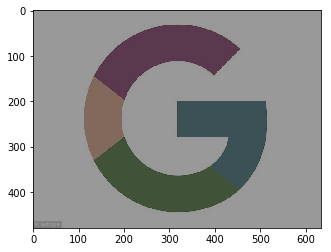

In [0]:
delta = 0.5
saturation=0.3
value=0.6
adj_hsvinyiq = tfa.image.distort_image_ops.adjust_hsv_in_yiq(color, delta, saturation, value)
plt.imshow(adj_hsvinyiq)

Dense Image Warp

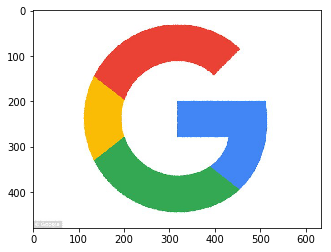

In [7]:
cl = tf.expand_dims(color,0)
new = tf.image.convert_image_dtype(cl, tf.dtypes.float32)

flow_shape = [1, color.shape[0], color.shape[1], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 0.25)
dense_img_warp = tfa.image.dense_image_warp(new, init_flows)
res = tf.squeeze(dense_img_warp,0)
plt.imshow(res)

Euclidian Distance transform
* Note : It takes only binary image and results in transformed image. If a different image is given it results in a image with single value

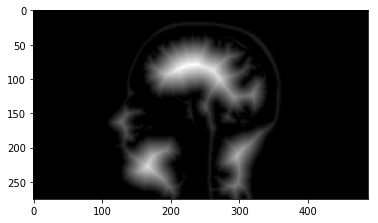

In [0]:
new = tf.image.convert_image_dtype(gray, tf.dtypes.float32)
im = tf.image.rgb_to_grayscale(new)
final = tf.image.convert_image_dtype(im, tf.dtypes.uint8)
fi = tf.expand_dims(final,0)
eucid = tfa.image.euclidean_dist_transform(fi)
eucidn = tf.squeeze(eucid,0)
eucidn = tf.squeeze(eucidn,2)
plt.imshow(eucidn, cmap='gray')

Bilinear Interpolation

In [0]:
grid = tf.constant([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]],shape=[1, 3, 3, 1])
query_points = tf.constant([[0., 0.], [1., 0.], [2., 0.5], [1.5, 1.5]],shape=[1, 4, 2])
expected_results = np.reshape(np.array([0., 3., 6.5, 6.]), [1, 4, 1])

interp = tfa.image.interpolate_bilinear(grid, query_points)
print(interp)

tf.Tensor(
[[[1. ]
  [2. ]
  [3. ]
  [2.5]]], shape=(1, 4, 1), dtype=float32)
